# Experimental preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os

In [2]:
list_img = os.listdir("C:/Users/pedro/OneDrive/Escritorio/Proyecto_IA_SS/Cancer_de_Mama_IA_SS_2023/data/raw_images")
img_path = "C:/Users/pedro/OneDrive/Escritorio/Proyecto_IA_SS/Cancer_de_Mama_IA_SS_2023/data/raw_images/"
data = pd.read_csv("train.csv")
data.head(10)

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False
3,2,10006,1874946579,R,CC,61.0,0,0,0,NaN,0,NaN,29,False
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,NaN,21,True
5,2,10011,270344397,L,MLO,55.0,0,0,0,0.0,0,NaN,21,True
6,2,10011,541722628,R,CC,55.0,0,0,0,NaN,0,NaN,21,False
7,2,10011,1031443799,R,MLO,55.0,0,0,0,NaN,0,NaN,21,False
8,2,10025,562340703,L,CC,75.0,0,0,0,NaN,0,NaN,29,False
9,2,10025,1365269360,L,MLO,75.0,0,0,0,NaN,0,NaN,29,False


In [3]:
patient_info = data.loc[data['patient_id']==10635,
                        ["patient_id", "image_id", "laterality", "view", "cancer"]].reset_index(drop=True)
patient_info

,patient_id,image_id,laterality,view,cancer
0,10635,797737008,L,CC,1
1,10635,1095412840,L,MLO,1
2,10635,46469454,R,MLO,0
3,10635,1216532269,R,CC,0


In [4]:
def concat_img_path( patient_id, image_id, img_path = img_path):
    image_path = img_path + str(patient_id) + "_" + str(image_id) + ".png"
    return image_path


def image_report(data, patient_id):
    patient_info = data.loc[data['patient_id']==patient_id,
                        ["patient_id", "image_id", "laterality", "view", "cancer"]].reset_index(drop=True)
    patient_images = []
    for i in range(len(patient_info)):
        image = concat_img_path(patient_info["patient_id"][i], patient_info["image_id"][i])
        patient_image = cv2.imread(image,
                  cv2.IMREAD_GRAYSCALE)
        patient_images.append(patient_image)
    
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 10))
    fig.suptitle('Grayscale images from patient: {patient_id}'.format(patient_id=patient_info["patient_id"][0]))
    ax1.imshow(patient_images[0], cmap='gray')
    ax1.set_title('Laterality: {} View: {} Cancer: {}'.format(patient_info["laterality"][0],
                                                            patient_info["view"][0],
                                                            patient_info["cancer"][0]))
    ax1.axis('off')
    ax2.imshow(patient_images[1], cmap='gray')
    ax2.set_title('Laterality: {} View: {} Cancer: {}'.format(patient_info["laterality"][1],
                                                    patient_info["view"][1],
                                                    patient_info["cancer"][1]))
    ax2.axis('off')
    ax3.imshow(patient_images[2], cmap='gray')
    ax3.set_title('Laterality: {} View: {} Cancer: {}'.format(patient_info["laterality"][2],
                                                    patient_info["view"][2],
                                                    patient_info["cancer"][2]))
    ax3.axis('off')
    try:
        ax4.imshow(patient_images[3], cmap='gray')
        ax4.set_title('Laterality: {} View: {} Cancer: {}'.format(patient_info["laterality"][3],
                                                        patient_info["view"][3],
                                                        patient_info["cancer"][3]))
        ax4.axis('off');
    except:
        print('Patient images not complete')
        
    return patient_info

,patient_id,image_id,laterality,view,cancer
0,10635,797737008,L,CC,1
1,10635,1095412840,L,MLO,1
2,10635,46469454,R,MLO,0
3,10635,1216532269,R,CC,0


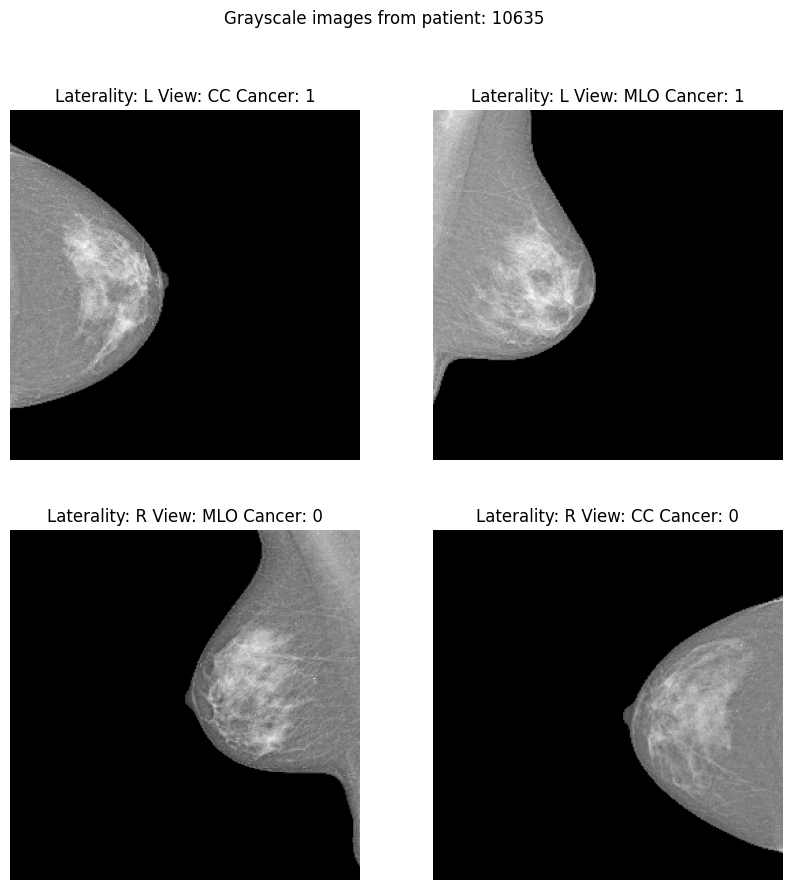

In [5]:
image_report(data, 10635)

In [6]:
def show_image(index, img_type='Gray'):
    image = cv2.imread(os.path.join("C:/Users/pedro/OneDrive/Escritorio/Proyecto_IA_SS/Cancer_de_Mama_IA_SS_2023/data/raw_images", list_img[index]))
    
    if img_type=='RGB':
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        plt.imshow(image, cmap='gray')
        plt.axis('off')
        plt.show()
    else:
        plt.imshow(image)
        plt.axis('off')
        plt.show()


def show_images(index):
    try:
        image = cv2.imread(os.path.join("C:/Users/pedro/OneDrive/Escritorio/Proyecto_IA_SS/Cancer_de_Mama_IA_SS_2023/data/raw_images", list_img[index]))
    except:
        print('Error: Image index out of bounds')
        
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.imshow(image)
    ax2.imshow(image_gray, cmap='gray')
    ax1.set_title(str(image.shape))
    ax2.set_title(str(image_gray.shape))
    ax1.axis('off')
    ax2.axis('off');

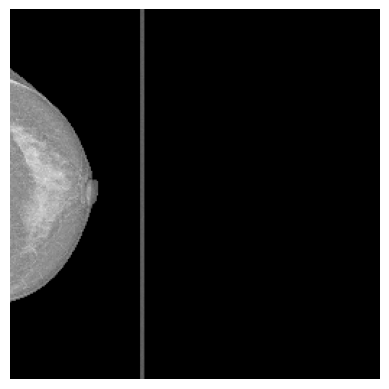

In [7]:
show_image(3)

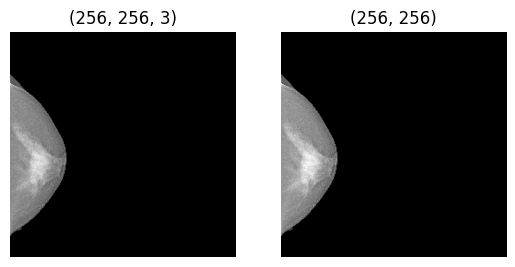

In [8]:
show_images(500)

## Digital Image Processing: Digital filters to enhance contrast

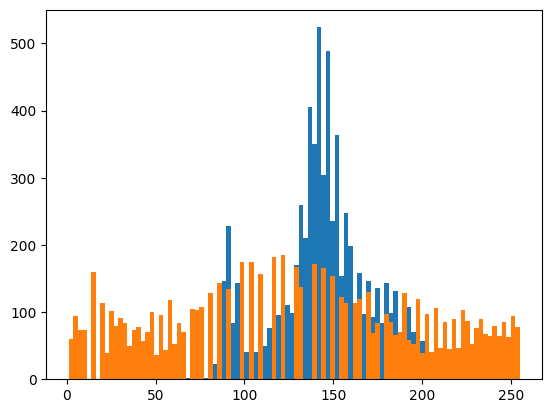

In [9]:
image = cv2.imread("C:/Users/pedro/OneDrive/Escritorio/Proyecto_IA_SS/Cancer_de_Mama_IA_SS_2023/data/raw_images/10006_462822612.png", cv2.IMREAD_GRAYSCALE)
eq_image = cv2.equalizeHist(image)

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl_img = clahe.apply(image)

plt.hist(image.flat, bins=100, range=(1,255))
plt.hist(eq_image.flat, bins=100, range=(1,255))
plt.show();

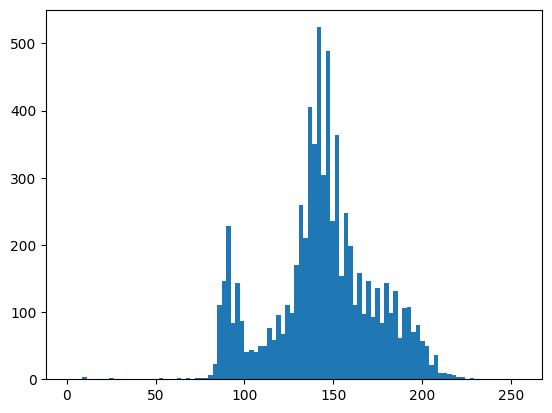

In [10]:
plt.hist(image.flat, bins=100, range=(1,255))
plt.show();

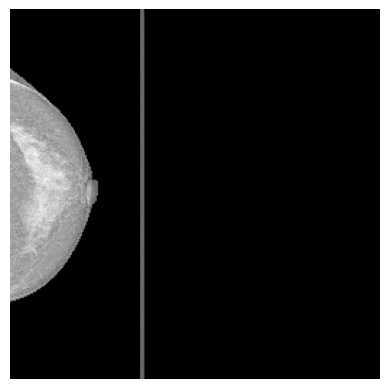

In [11]:
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

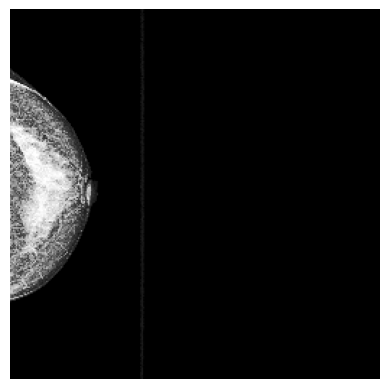

In [12]:
plt.imshow(eq_image, cmap='gray')
plt.axis('off')
plt.show()

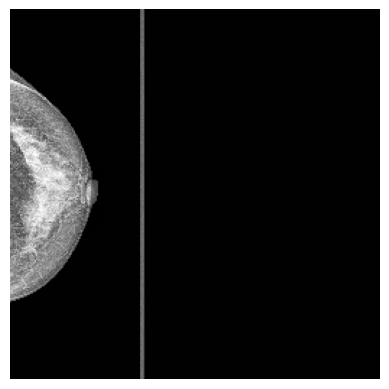

In [13]:
plt.imshow(cl_img, cmap='gray')
plt.axis('off')
plt.show()

In [14]:
plt.style.use("seaborn");

C:\Users\pedro\AppData\Local\Temp\ipykernel_3428\4120163455.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn");


In [15]:
def filter_analysis(data , index):
    
    image = concat_img_path(data["patient_id"][index], data["image_id"][index])
    
    image = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
    eq_image = cv2.equalizeHist(image)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    cl_img = clahe.apply(image)

    fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(10, 10))
    fig.suptitle("Filter analysis and exploration")

    ax1.imshow(image, cmap='gray')
    ax1.set_title('Original Image')
    ax1.axis('off')

    ax2.imshow(eq_image, cmap='gray')
    ax2.set_title('HE filter')
    ax2.axis('off')

    ax3.imshow(cl_img, cmap='gray')
    ax3.set_title('CLAHE filter')
    ax3.axis('off')

    ax4.hist(image.flat, bins=100, range=(1,255))
    ax4.set_title('Pixel Distribution')

    ax5.hist(eq_image.flat, bins=100, range=(1,255))
    ax5.set_title('HE pixel Distribution')

    ax6.hist(cl_img.flat, bins=100, range=(10,255))
    ax6.set_title(' CLAHE pixel Distribution');

In [16]:
cancer_patients = data.loc[data['cancer']==1, 'patient_id']
cancer_patients

87       10130
88       10130
89       10130
90       10130
190      10226
         ...  
54485     9707
54593     9840
54594     9840
54595     9851
54596     9851
Name: patient_id, Length: 1158, dtype: int64

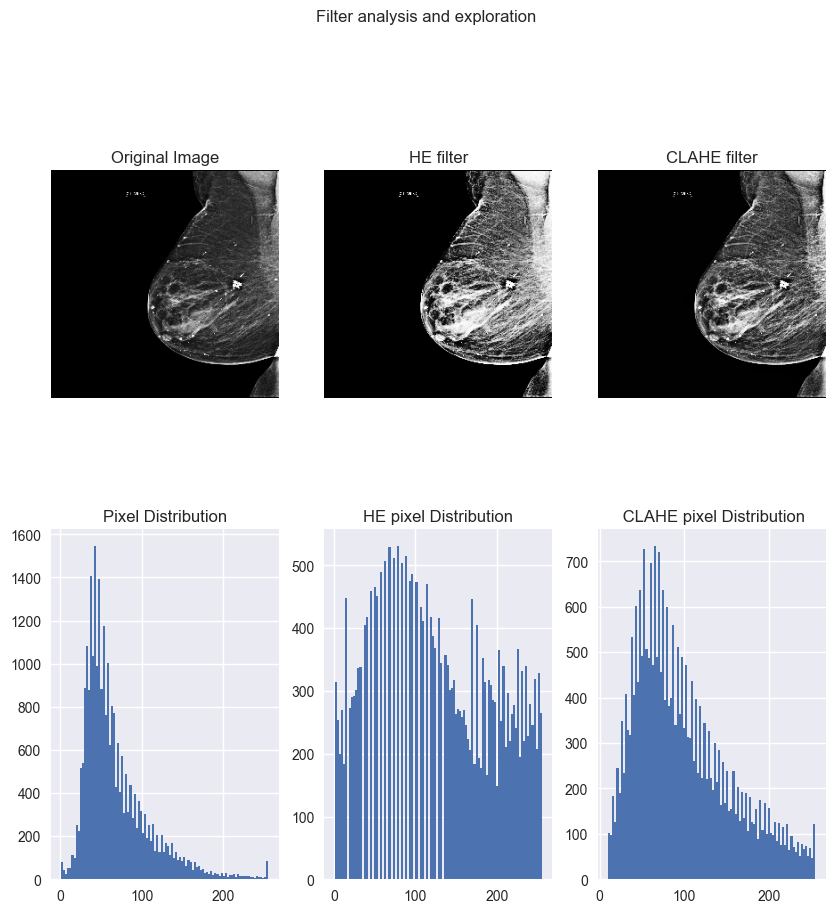

In [17]:
filter_analysis(data, 90)

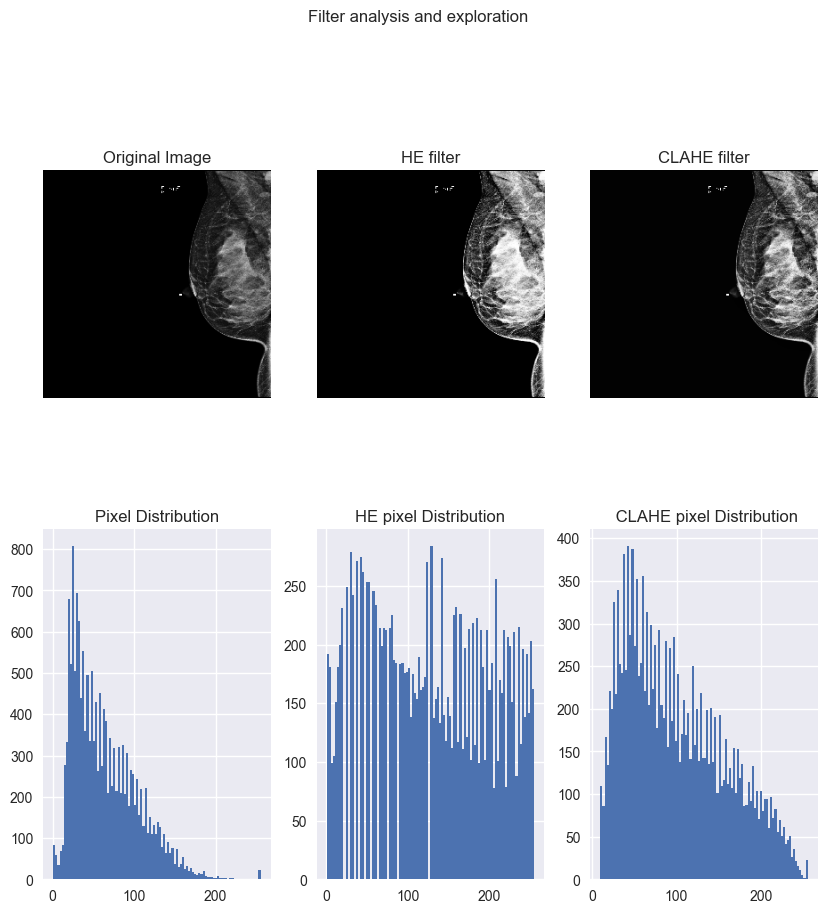

In [18]:
filter_analysis(data, 54568)

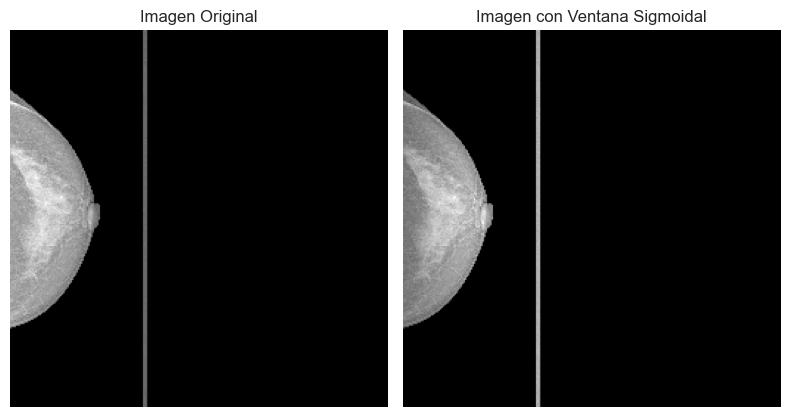

In [19]:
image = cv2.imread("C:/Users/pedro/OneDrive/Escritorio/Proyecto_IA_SS/Cancer_de_Mama_IA_SS_2023/data/raw_images/10006_462822612.png", cv2.IMREAD_GRAYSCALE)
center = 0.6  # Centro de la ventana (0 a 1)
slope = 3.0  # Pendiente de la ventana (mayor valor = transición más suave)
height, width = image.shape[:2]
x = np.linspace(0, 1, width)
y = np.linspace(0, 1, height)
X, Y = np.meshgrid(x, y)
window = 1 / (1 + np.exp(-slope * (X - center)))
windowed_image = image * window
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

 

plt.subplot(1, 2, 2)
plt.imshow(windowed_image, cmap='gray')
plt.title('Imagen con Ventana Sigmoidal')
plt.axis('off')

 

plt.tight_layout()
plt.show()

### Check filters.py working fine

In [20]:
from filters import apply_HE_filter, apply_CLAHE_filter, apply_sigmoidal_filter

In [21]:
image = cv2.imread("C:/Users/pedro/OneDrive/Escritorio/Proyecto_IA_SS/Cancer_de_Mama_IA_SS_2023/data/raw_images/10006_462822612.png", cv2.IMREAD_GRAYSCALE)

Filter applied successfully!


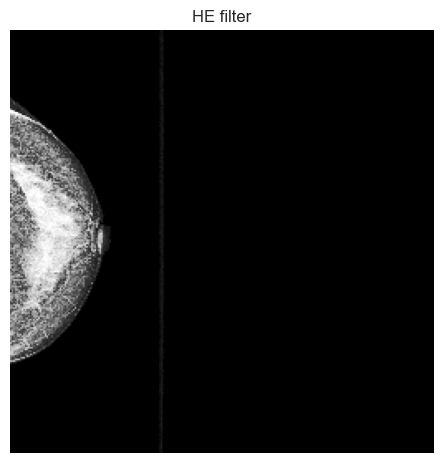

In [22]:
img = apply_HE_filter(image)

Filter applied successfully!


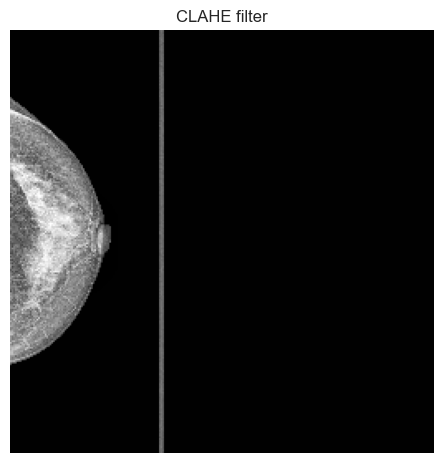

In [23]:
img_1 = apply_CLAHE_filter(image)

Filter applied successfully!


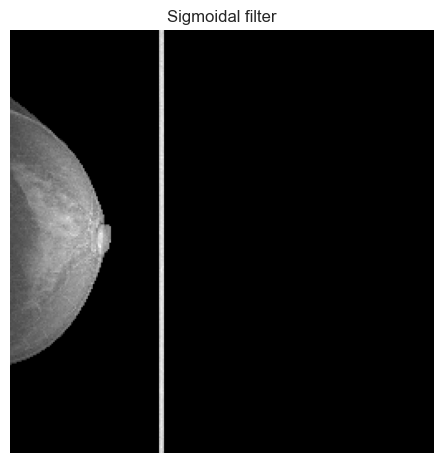

In [24]:
img_2 = apply_sigmoidal_filter(image)

### Exploring cropping images to extract ROI

In [25]:
def fit_image(fname):
    X = cv2.imread(fname)
    
    # Some images have narrow exterior "frames" that complicate selection of the main data. Cutting off the frame
    X = X[5:-5, 5:-5]
    
    # regions of non-empty pixels
    output= cv2.connectedComponentsWithStats((X > 20).astype(np.uint8)[:, :, 0], 8, cv2.CV_32S)

    # stats.shape == (N, 5), where N is the number of regions, 5 dimensions correspond to:
    # left, top, width, height, area_size
    stats = output[2]

    # finding max area which always corresponds to the breast data. 
    idx = stats[1:, 4].argmax() + 1
    x1, y1, w, h = stats[idx][:4]
    x2 = x1 + w
    y2 = y1 + h
    
    # cutting out the breast data
    X_fit = X[y1: y2, x1: x2]
    
    return X_fit[:, :, 0]

In [26]:
ROI_img = fit_image("C:/Users/pedro/OneDrive/Escritorio/Proyecto_IA_SS/Cancer_de_Mama_IA_SS_2023/data/raw_images/10006_462822612.png")

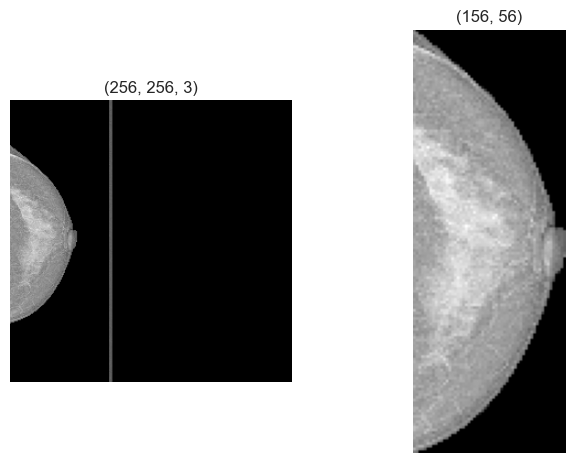

In [27]:


image = cv2.imread("C:/Users/pedro/OneDrive/Escritorio/Proyecto_IA_SS/Cancer_de_Mama_IA_SS_2023/data/raw_images/10006_462822612.png")
        
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(image)
ax2.imshow(ROI_img, cmap='gray')
ax1.set_title(str(image.shape))
ax2.set_title(str(ROI_img.shape))
ax1.axis('off')
ax2.axis('off');

In [28]:
resized_img = cv2.resize(ROI_img, [256, 256])

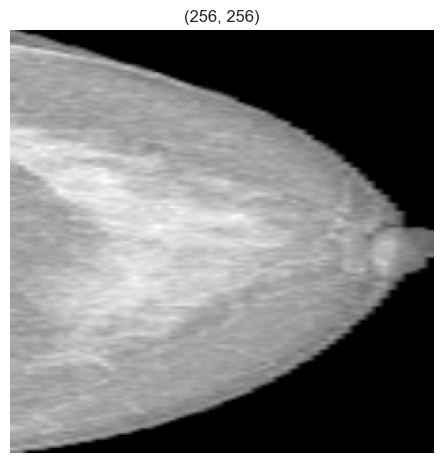

In [29]:
plt.imshow(resized_img, cmap='gray')
plt.axis('off')
plt.title(str(resized_img.shape))
plt.show()

## Exploring windowing function

In [30]:
def _apply_windowing_np_v1(arr,
                           window_width=None,
                           window_center=None,
                           voi_func='LINEAR',
                           y_min=0,
                           y_max=255):
    assert window_width > 0
    y_range = y_max - y_min
    # float64 needed (default) or just float32 ?
    # arr = arr.astype(np.float64)
    arr = arr.astype(np.float32)

    if voi_func in ['LINEAR', 'LINEAR_EXACT']:
        # PS3.3 C.11.2.1.2.1 and C.11.2.1.3.2
        if voi_func == 'LINEAR':
            if window_width < 1:
                raise ValueError(
                    "The (0028,1051) Window Width must be greater than or "
                    "equal to 1 for a 'LINEAR' windowing operation")
            window_center -= 0.5
            window_width -= 1
        below = arr <= (window_center - window_width / 2)
        above = arr > (window_center + window_width / 2)
        between = np.logical_and(~below, ~above)

        arr[below] = y_min
        arr[above] = y_max
        if between.any():
            arr[between] = ((
                (arr[between] - window_center) / window_width + 0.5) * y_range
                            + y_min)
    elif voi_func == 'SIGMOID':
        arr = y_range / (1 +
                         np.exp(-4 *
                                (arr - window_center) / window_width)) + y_min
    else:
        raise ValueError(
            f"Unsupported (0028,1056) VOI LUT Function value '{voi_func}'")
    return arr

In [31]:
test_image = cv2.imread("C:/Users/pedro/OneDrive/Escritorio/Proyecto_IA_SS/Cancer_de_Mama_IA_SS_2023/data/raw_images/10006_462822612.png",
                       cv2.IMREAD_GRAYSCALE)

In [32]:
test_image = np.array(test_image, dtype=np.float64)
test_image

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [33]:
window_img = _apply_windowing_np_v1(test_image, 
                                   window_width=0.1,
                                   window_center=1,
                                   voi_func='SIGMOID')

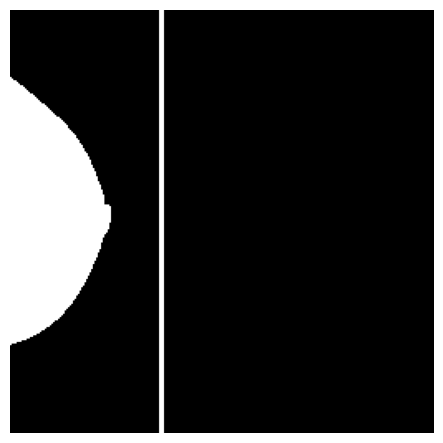

In [34]:
plt.imshow(window_img, cmap='gray')
plt.axis('off')
plt.show()

## Same preprocessing but for 1024x1024 images

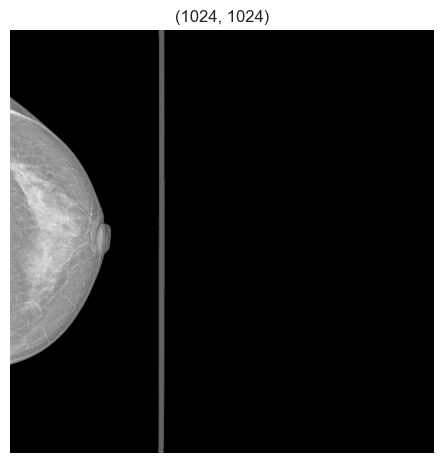

In [44]:
rescaled_img_path = "C:/Users/pedro/OneDrive/Escritorio/output/"

new_img = cv2.imread(os.path.join(rescaled_img_path, "10006_462822612.png"), cv2.IMREAD_GRAYSCALE)
plt.imshow(new_img, cmap='gray')
plt.axis('off')
plt.title(str(new_img.shape))
plt.show()

Filter applied successfully!


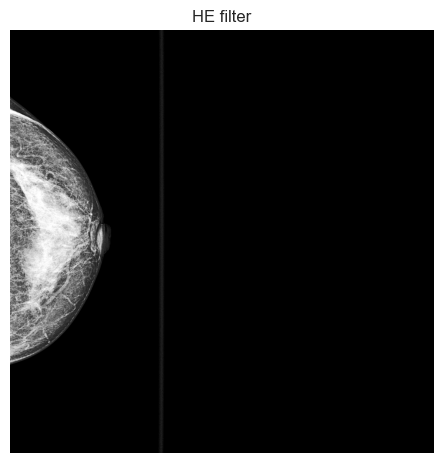

In [46]:
he_img = apply_HE_filter(new_img)

Filter applied successfully!


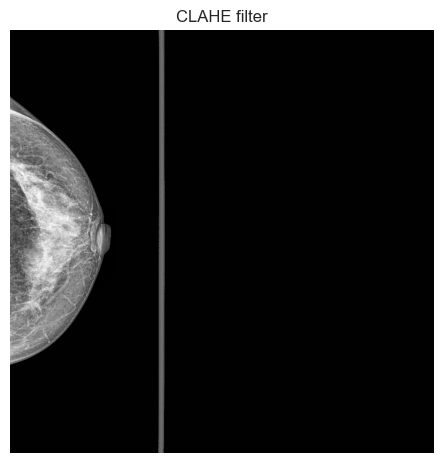

In [47]:
cl_img = apply_CLAHE_filter(new_img)